In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [49]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [50]:
gas_consump = pd.read_csv('natural gas consump_2001Jan-2020Oct_monthly.csv', parse_dates = True, index_col = 'Date')
gas_consump = gas_consump.drop(['U.S. Natural Gas Total Consumption (MMcf)','U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf)','U.S. Natural Gas Pipeline & Distribution Use (MMcf)','Natural Gas Delivered to Consumers in the U.S. (MMcf)','Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf)','U.S. Natural Gas Industrial Consumption (MMcf)','U.S. Natural Gas Vehicle Fuel Consumption (MMcf)','U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)','Unnamed: 10'], axis = 1)
gas_consump

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
1973-01-01,843900.0
1973-02-01,747331.0
1973-03-01,648504.0
1973-04-01,465867.0
1973-05-01,326313.0
...,...
2020-07-01,117990.0
2020-08-01,109639.0
2020-09-01,125365.0


In [51]:
gas_start_index = '2001-01-01'
gas_end_index = '2020-01-01'
gas_consump = gas_consump[gas_start_index:gas_end_index]
gas_consump

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
2001-01-01,976677.0
2001-02-01,780482.0
2001-03-01,681884.0
2001-04-01,400728.0
2001-05-01,209327.0
...,...
2019-09-01,109775.0
2019-10-01,231622.0
2019-11-01,588674.0


In [52]:
upsampled_gas = gas_consump.resample('W').ffill()
upsampled_gas.drop(upsampled_gas.tail(1).index,inplace=True)
upsampled_gas

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
2001-01-07,976677.0
2001-01-14,976677.0
2001-01-21,976677.0
2001-01-28,976677.0
2001-02-04,780482.0
...,...
2019-12-01,752105.0
2019-12-08,752105.0
2019-12-15,752105.0


In [53]:
sigma = upsampled_gas.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 991)
variations

array([-1.32011252e+04, -7.56747302e+04,  5.57729585e+04, -1.50662297e+05,
       -3.85238756e+03, -3.13838971e+05, -5.66007375e+04,  1.04534349e+03,
        1.19346091e+05, -1.27843988e+05, -3.54758562e+05, -5.78709479e+04,
        2.13746907e+05,  3.53406622e+04,  4.84317901e+04, -4.38624861e+05,
        4.36893623e+04,  1.48254523e+05,  7.85877056e+04,  2.53255114e+04,
       -3.54336096e+05,  7.26611585e+04,  9.09487849e+04, -6.31331053e+04,
       -1.48474697e+05,  1.52348823e+05,  1.93974268e+05,  2.94457500e+04,
        2.18401000e+05, -2.43254964e+04,  2.63203457e+05,  3.31385651e+05,
        5.84664891e+04,  1.08058453e+05,  3.94082157e+04,  5.93987679e+04,
       -7.05500145e+04, -4.17862916e+04,  1.08851988e+05,  2.62424844e+05,
        1.38113283e+05,  1.40234291e+05, -2.38152420e+05, -2.05348173e+05,
        5.15487947e+04, -1.51706365e+05, -3.00134139e+04, -2.30504693e+04,
       -8.78913786e+04,  2.69007014e+04, -1.81915691e+05,  8.76670541e+04,
        1.07635843e+05, -

In [54]:
upsampled_gas_series = pd.DataFrame.to_numpy(upsampled_gas).flatten()
upsampled_gas_series = upsampled_gas_series + variations
upsampled_gas_series

array([ 9.63475875e+05,  9.01002270e+05,  1.03244996e+06,  8.26014703e+05,
        7.76629612e+05,  4.66643029e+05,  7.23881262e+05,  7.81527343e+05,
        8.01230091e+05,  5.54040012e+05,  3.27125438e+05,  6.24013052e+05,
        6.14474907e+05,  4.36068662e+05,  4.49159790e+05, -3.78968606e+04,
        4.44417362e+05,  3.57581523e+05,  2.87914706e+05,  2.34652511e+05,
       -1.45009096e+05,  2.19498159e+05,  2.37785785e+05,  8.37038947e+04,
       -1.63769733e+03,  2.76125823e+05,  3.17751268e+05,  1.53222750e+05,
        3.42178000e+05,  9.94515036e+04,  3.80137457e+05,  4.48319651e+05,
        1.75400489e+05,  2.24992453e+05,  1.66890216e+05,  1.86880768e+05,
        5.69319855e+04,  8.56957084e+04,  2.36333988e+05,  4.99890844e+05,
        3.75579283e+05,  3.77700291e+05, -6.86420491e+02,  1.55372827e+05,
        4.12269795e+05,  2.09014635e+05,  3.30707586e+05,  5.85974531e+05,
        5.21133621e+05,  6.35925701e+05,  4.27109309e+05,  6.96692054e+05,
        9.22862843e+05,  

In [55]:
upsampled_gas['U.S. Natural Gas Residential Consumption (MMcf)']  = upsampled_gas_series
upsampled_gas

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
2001-01-07,9.634759e+05
2001-01-14,9.010023e+05
2001-01-21,1.032450e+06
2001-01-28,8.260147e+05
2001-02-04,7.766296e+05
...,...
2019-12-01,6.060118e+05
2019-12-08,8.286665e+05
2019-12-15,7.519214e+05


In [56]:
upsampled_gas_01_08 = upsampled_gas[:417]
upsampled_gas_01_08

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
2001-01-07,9.634759e+05
2001-01-14,9.010023e+05
2001-01-21,1.032450e+06
2001-01-28,8.260147e+05
2001-02-04,7.766296e+05
...,...
2008-11-30,4.333457e+05
2008-12-07,9.989935e+05
2008-12-14,5.635120e+05


In [57]:
upsampled_gas_09_19 = upsampled_gas[417:]
upsampled_gas_09_19

,U.S. Natural Gas Residential Consumption (MMcf)
Date,
2009-01-04,1.166511e+06
2009-01-11,9.357362e+05
2009-01-18,9.389947e+05
2009-01-25,9.046054e+05
2009-02-01,7.992948e+05
...,...
2019-12-01,6.060118e+05
2019-12-08,8.286665e+05
2019-12-15,7.519214e+05


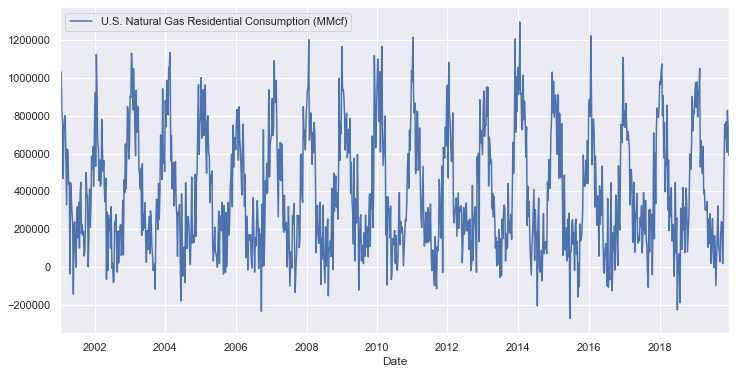

In [58]:
upsampled_gas.plot.line()

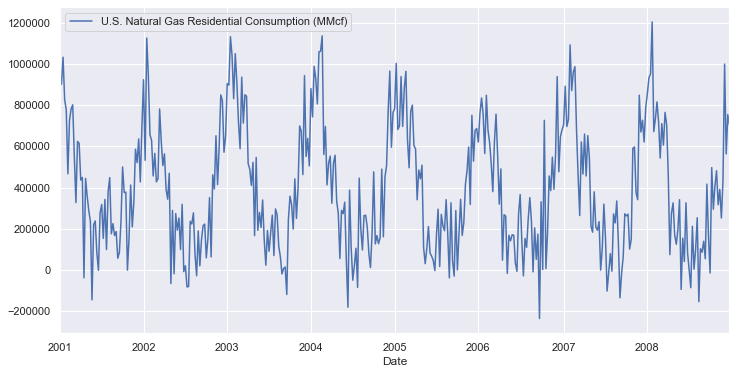

In [59]:
upsampled_gas_01_08.plot.line()

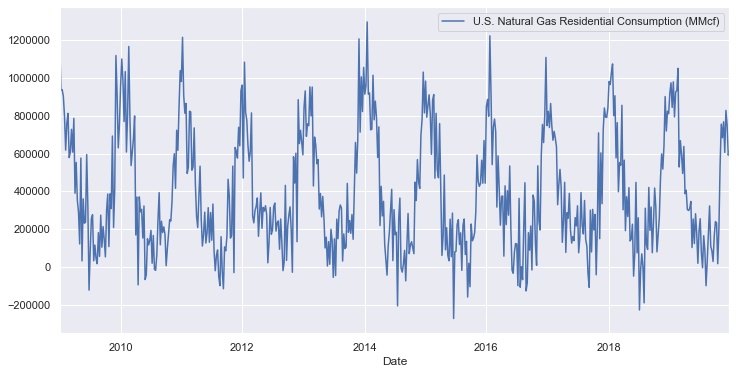

In [60]:
upsampled_gas_09_19.plot.line()

In [61]:
upsampled_gas_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/natural_gas_consump_01_08.csv')

In [62]:
upsampled_gas_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/natural_gas_consump_09_19.csv')